In [1]:
%matplotlib notebook
import numpy as np
from PIL import Image 
import string
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
import base64
from sklearn.cluster import KMeans
import multiprocessing
# import IPython

In [2]:

cpu_threads=max(1,multiprocessing.cpu_count()-1)
cpu_threads

7

RGB (575, 385)


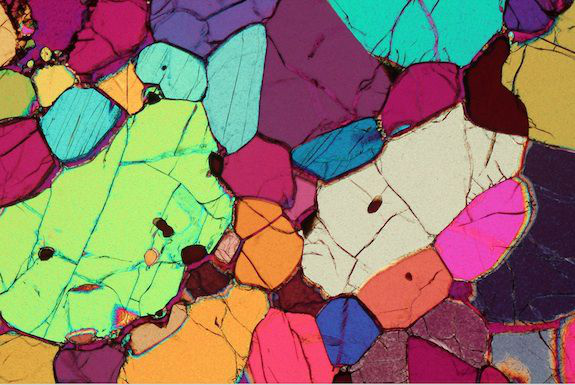

In [3]:

img=Image.open('olivino.jpg')
pix=img.load()
print(img.mode, img.size)

img

In [4]:
palet_len=30

In [5]:
kmean=KMeans(palet_len, n_jobs=20)

# copy pixel data
data = np.asarray(img.getdata())

# fix the kmean
kmean.fit(data)

# assig each pixel to cluster
imgclust=kmean.predict(data)

# reshape data for easier access in copy process

C:\Users\IvanE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


[0.5254902  0.49019608 0.26666667 ... 0.82745098 0.83921569 0.85490196]


(221375, 3)

Pixels 3D chart compressed image


<IPython.core.display.Javascript object>


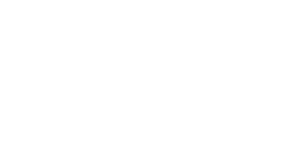

In [6]:

def treed__pixel_chart(data, text, alpha=0.1):
    print(text)
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], alpha=alpha, color=data/255.0)

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    plt.show()
    
treed__pixel_chart(np.take(data, imgclust, axis=0), 'Pixels 3D chart compressed image', alpha=0.1)


In [46]:

imgclust=imgclust.reshape((img.size[1],img.size[0]))
imgclust

array([[10,  1, 24, ...,  4, 24, 21],
       [24, 24, 24, ..., 12, 13, 16],
       [24, 24, 24, ..., 12, 13, 20],
       ...,
       [20, 20, 20, ..., 11, 11, 11],
       [20, 20,  5, ..., 29, 29,  9],
       [14, 14, 14, ..., 14, 14, 14]])

## Palette

In [47]:

palette=np.vectorize(int)(kmean.cluster_centers_)

palette=[tuple(p)for p in palette]

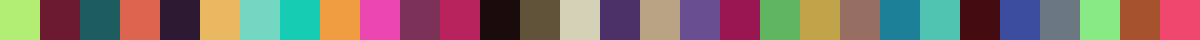

In [48]:

palette_height=40

img_palette=Image.new(img.mode, (palet_len*palette_height, palette_height))
pix_palette=img_palette.load()

for x in range(img_palette.size[0]):
    for y in range(img_palette.size[1]):
        pix_palette[x,y]=palette[x//palette_height]

img_palette

In [49]:

def compress_image(path, palet_len=10, skip_3d_original=False):
    img=Image.open(path)
    pix=img.load()
    print(img.mode, img.size)

    kmean=KMeans(palet_len, n_jobs=cpu_threads)

    # copy pixel data
    data = np.asarray(img.getdata())

    

    if not skip_3d_original:
        treed__pixel_chart(data, 'Pixels 3D chart original image', alpha=0.1)
    
    print("fitting model")
    # fix the kmean
    kmean.fit(data)
    
    # getting pallete from KMean
    palette=np.vectorize(int)(kmean.cluster_centers_)

    print("compressing the image")
    # assig each pixel to cluster
    imgclust=kmean.predict(data)

    # reshape data for easier access in copy process
    treed__pixel_chart(np.take(palette, imgclust, axis=0), 'Pixels 3D chart compressed image '+str(palet_len)+' clusters', alpha=0.1)

    imgclust=imgclust.reshape((img.size[1],img.size[0]))
    palette=[tuple(p)for p in palette]

    palette_height=40

    img_palette=Image.new(img.mode, (palet_len*palette_height, palette_height))
    pix_palette=img_palette.load()

    for x in range(img_palette.size[0]):
        for y in range(img_palette.size[1]):
            pix_palette[x,y]=palette[x//palette_height]
    print("Pallete")
    IPython.display.display(img_palette)
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            pix[x,y]=palette[imgclust[y][x]]


    return img

RGB (575, 385)
Pixels 3D chart original image


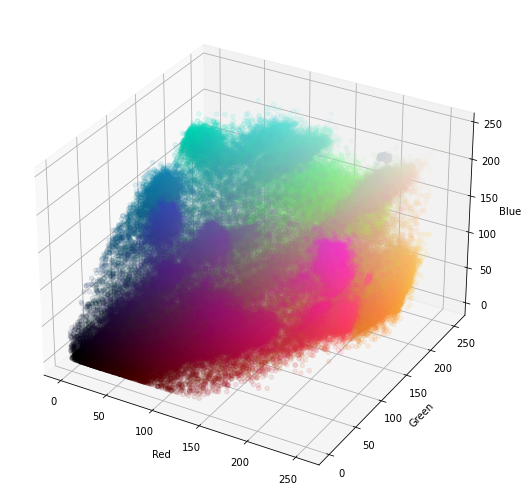

fitting model


C:\Users\IvanE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


compressing the image
Pixels 3D chart compressed image 8 clusters


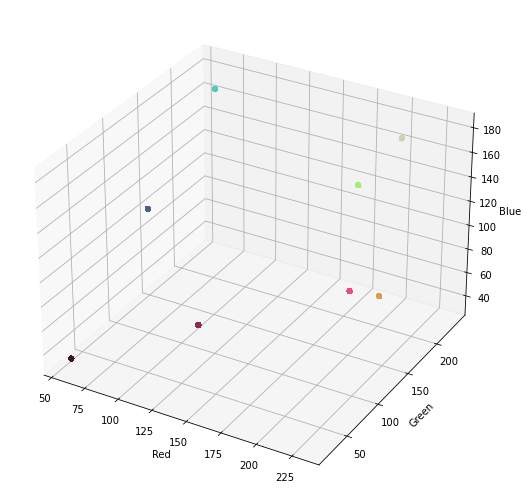

Pallete


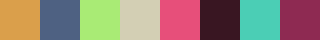

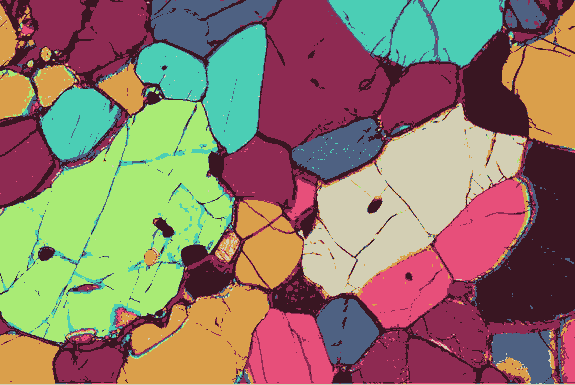

In [50]:
compress_image("olivino.jpg", 8)

RGB (575, 385)
fitting model


C:\Users\IvanE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


compressing the image
Pixels 3D chart compressed image 3 clusters


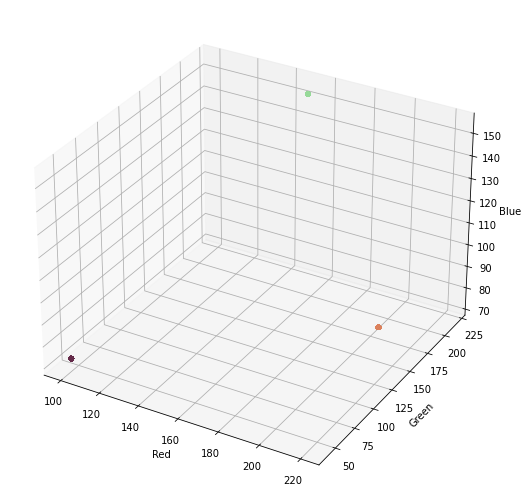

Pallete


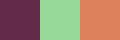

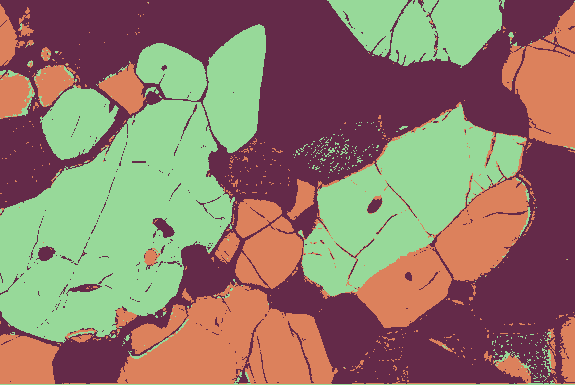

In [20]:
compress_image("olivino.jpg", 3, skip_3d_original=True)